Note that this Notebook isn't quite done yet... I had to fix something in the prices package that isn't quite ready!

In [1]:
import prices
import fitmodels

In [2]:
help(fitmodels)

Help on module fitmodels:

NAME
    fitmodels

DESCRIPTION
    #import numpy as np
    #def area(*args):
    #    weights=[20615.868798490148, 5.287695862982692]
    #    res=np.zeros(len(args[0]))
    #    if len(weights)==len(args)+1:
    #        for x in range(1,len(args)+1):
    #            res+=weights[x]*args[x-1]
    #        res+=weights[0]
    #        return res
    #    else:
    #        print('Error in model definition: Unexpected number of inputs!')

FUNCTIONS
    area(*args)
    
    areaFront(*args)
    
    areaFront_nesterov(*args)
    
    area_nesterov(*args)

FILE
    c:\users\twwilko\documents\python scripts\acm 612\git repo\intro2dsa\project 1\fitmodels.py




In [3]:
dataTestFeatures=prices.pd.read_csv("DATA/test.csv")

# Replace NaN values with the mean of not-NaN values
indexNaN=prices.np.isnan(dataTestFeatures['LotFrontage'])
replaceNaN=prices.np.array(dataTestFeatures['LotFrontage'][-indexNaN].mean()).round()
columnNaN=dataTestFeatures['LotFrontage'].values

columnNaN[indexNaN] = replaceNaN
dataTestFeatures['LotFrontage']=columnNaN

del(indexNaN,replaceNaN,columnNaN)
dataTestFeatures[:10]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,69.0,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [4]:
dataTestLabels=prices.pd.read_csv("DATA/sample_submission.csv")
dataTestLabels[:10]

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
5,1466,177150.989247
6,1467,172070.659229
7,1468,175110.956520
8,1469,162011.698832
9,1470,160726.247831


In [5]:
dataTest=dataTestLabels.set_index('Id').join(dataTestFeatures.set_index('Id'))[['LotArea','LotFrontage','SalePrice']]
dataTest[:10]

,LotArea,LotFrontage,SalePrice
Id,,,
1461,11622,80.0,169277.052498
1462,14267,81.0,187758.393989
1463,13830,74.0,183583.683570
1464,9978,78.0,179317.477511
1465,5005,43.0,150730.079977
1466,10000,75.0,177150.989247
1467,7980,69.0,172070.659229
1468,8402,63.0,175110.956520
1469,10176,85.0,162011.698832


In [6]:
(areas,fronts)=dataTest['LotArea'].values,dataTest['LotFrontage'].values
predArea=fitmodels.area(areas)
predAreaNest=fitmodels.area_nesterov(areas)
predAreaFront=fitmodels.areaFront(areas,fronts)
predAreaFrontNest=fitmodels.areaFront_nesterov(areas,fronts)
for x in (predArea,predAreaNest,predAreaFront,predAreaFrontNest):
    print(x.round(3),'\nMean: ',x.mean().round(3),'\n')

[ 79731.873 100438.856  97017.702 ... 145320.948  70486.147  64113.563] 
Mean:  65617.94 

[ 82061.652  96046.449  93735.918 ... 126358.298  75817.401  71513.573] 
Mean:  72529.578 

[-118172.117 -108800.122 -116729.26  ...  -16758.226 -138744.089
 -130138.226] 
Mean:  -134523.81 

[-134637.268 -118908.727 -125594.777 ...  -38869.009 -152157.666
 -149637.699] 
Mean:  -151740.533 



In [7]:
preds=list([predArea,predAreaNest,predAreaFront,predAreaFrontNest])
for x in preds:
    print(x.mean().round(3))

65617.94
72529.578
-134523.81
-151740.533


In [8]:
labels=dataTestLabels['SalePrice'].values
errors=prices.np.array(preds-labels)
errors

array([[ -89545.1792504 ,  -87319.53792436,  -86565.98118786, ...,
         -73901.47565836, -114438.13295397, -123628.30370011],
       [ -87215.40001407,  -91711.94480422,  -89847.76601374, ...,
         -92864.12563994, -109106.87855575, -116228.2933478 ],
       [-287449.16924478, -296558.51572054, -300312.94312658, ...,
        -235980.64917172, -323668.36842053, -317880.09286156],
       [-303914.32088291, -306667.12100408, -309178.46015248, ...,
        -258091.43223702, -337081.94523699, -337379.5655377 ]])

In [9]:
loss=list()
for x in errors:
    loss.append(prices.ssq(x))
loss=prices.np.array(loss)
prices.np.diff(loss)

array([-2.97999056e+12,  1.27310849e+14,  1.64700550e+13])

In [10]:
abs(errors).max()

410960.14625625906

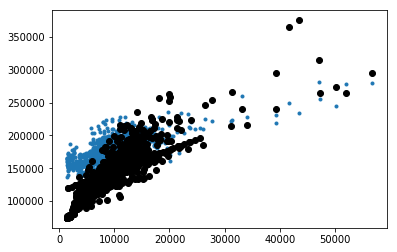

In [11]:
prices.plt.plot(areas,labels,'.')
prices.plt.plot(areas,preds[2]+280000,'ko')
prices.plt.show()

In [12]:
dataTrain=prices.pd.read_pickle("Clean Training Data.txt")

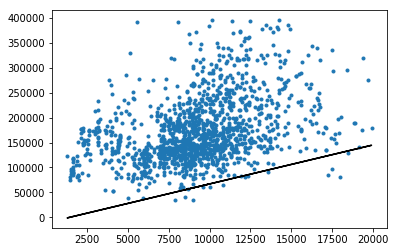

In [13]:
trainPredArea=fitmodels.area(dataTrain['LotArea'].values)
prices.plt.plot(dataTrain['LotArea'].values,dataTrain['SalePrice'].values,'.')
prices.plt.plot(dataTrain['LotArea'].values,trainPredArea,'k-')
prices.plt.show()